# Seq

In [37]:
from Bio.Seq import Seq

coding_dna = Seq("ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG")
coding_dna

Seq('ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG')

`Seq` objects are built on strings but have additional methdods.

In [38]:
print(f'   coding dna: {coding_dna}')

template_dna = coding_dna.reverse_complement()
print(f' template dna: {template_dna}')

messenger_rna = coding_dna.transcribe()
print(f'messenger rna: {messenger_rna}')

protein = messenger_rna.translate()
print(f'      protein: {protein}')

   coding dna: ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
 template dna: CTATCGGGCACCCTTTCAGCGGCCCATTACAATGGCCAT
messenger rna: AUGGCCAUUGUAAUGGGCCGCUGAAAGGGUGCCCGAUAG
      protein: MAIVMGR*KGAR*


In [39]:
# can also get protein direct from coding dna
print(coding_dna.translate())

# can also recover coding dna from mRNA
print(messenger_rna.back_transcribe())

MAIVMGR*KGAR*
ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG


## Translation tables

https://www.ncbi.nlm.nih.gov/Taxonomy/Utils/wprintgc.cgi

In [40]:
# other options for translate
print(coding_dna.translate(table="Vertebrate Mitochondrial"))
print(coding_dna.translate(table="Bacterial"))
print(coding_dna.translate(table=2))
print(coding_dna.translate(to_stop=True))
print(coding_dna.translate(table="Vertebrate Mitochondrial", to_stop=True))
print(coding_dna.translate(table=2, to_stop=True))

MAIVMGRWKGAR*
MAIVMGR*KGAR*
MAIVMGRWKGAR*
MAIVMGR
MAIVMGRWKGAR
MAIVMGRWKGAR


In [41]:
from Bio.Data import CodonTable

standard_table = CodonTable.unambiguous_dna_by_name["Standard"]

print(standard_table.start_codons)
print(standard_table.stop_codons)
print()
print(standard_table)

['TTG', 'CTG', 'ATG']
['TAA', 'TAG', 'TGA']

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   |

## Subsequences

In [49]:
# standard string methods
print(coding_dna.index("CC")) # index of first occurrence (error if no match)
print(coding_dna.find("CC")) # index of first occurrence (-1 if no match)
print(coding_dna.rfind("CC")) # index of last occurrence (-1 if no match)
print(coding_dna.count('CC')) # non-overlapping counts

# additional methods
print(list(coding_dna.search(["CC"]))) # indexes of all matches (incl overlapping) in multiple substrings

4
4
32
3
[(4, 'CC'), (17, 'CC'), (31, 'CC'), (32, 'CC')]


## Nucleotide distibution

In [52]:
nucleotide_counts = {n: coding_dna.count(n) for n in ['A', 'T', 'C', 'G']}
nucleotide_counts

{'A': 9, 'T': 8, 'C': 8, 'G': 14}

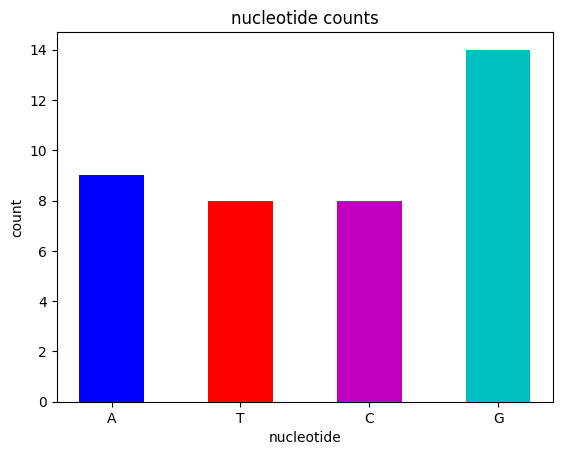

In [56]:
import matplotlib.pyplot as plt
plt.bar(nucleotide_counts.keys(),
        nucleotide_counts.values(),
        width=0.5,
        color=['b', 'r', 'm', 'c'])
plt.xlabel('nucleotide')
plt.ylabel('count')
plt.title('nucleotide counts')
plt.show()